#**Montar directorio de Google drive** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Instalando dependencias**

In [ ]:
#import os
#os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/tt-ia_models/')
#!pip install -r requirements_colab.txt
#!pip uninstall -y -r requirements_colab.txt

# **Imports**

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/tt-ia_models/')
import tensorflow as tf
#Imports para csv_utils
import os
import pandas as pd
import re
import time
#Imports para TF
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/tt-ia_models/')

# **Definiendo Paths**

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/git-repos/tt-ia_models/')
root_path = os.getcwd() #Path del directorio root
dataset_path = root_path + '/src/datasets/wheather-dataset/'
print(f'root_path: {root_path}')
print(f'dataset_path: {dataset_path}')

root_path: /content/drive/MyDrive/Colab Notebooks/git-repos/tt-ia_models
dataset_path: /content/drive/MyDrive/Colab Notebooks/git-repos/tt-ia_models/src/datasets/wheather-dataset/


# **CSV utils**

In [ ]:
def to_csv(list_content,filename,columns):
    COLUMNAS = columns
    town_df = pd.DataFrame(list_content,columns=COLUMNAS)
    town_df.to_csv('csv_dataset/' + filename + '.csv')

def get_csv_data(filename,param):
    #Lee el .csv
    df = pd.read_csv(filename)
    df.pop('Unnamed: 0')
    return df

In [ ]:
#Sección exclusiva para probar csv utils

# **Plot utils**

In [ ]:
def graph_data(dataFrame, param):
    dataFrame.plot(x='FECHA', y=param)
    plt.show()

In [ ]:
#Sección exclusiva para probar plot utils

# **Obteniendo los nombres de los archivos csv a leer**

In [ ]:
with open(root_path + '/csv_towns_names.pickle', "rb") as a_file:
		FILES = pickle.load(a_file)
		print(FILES)
    

['14002-ACATLAN DE JUAREZ.csv', '14006-TEOCALTICHE.csv', '14009-AMECA.csv', '14011-LA HUERTA.csv', '14016-IXTLAHUACAN DE LOS MEMBRILLOS.csv', '14017-ATOTONILCO EL ALTO.csv', '14018-ATOYAC.csv', '14023-BOLAÑOS.csv', '14024-TOMATLAN.csv', '14026-COLOTLAN.csv', '14028-CIHUATLAN.csv', '14029-CONCEPCION DE BUENOS AIRES.csv', '14030-ZAPOTLAN EL GRANDE.csv', '14033-LAGOS DE MORENO.csv', '14034-TAMAZULA DE GORDIANO.csv', '14035-MASCOTA.csv', '14036-CUAUTITLAN DE GARCIA BARRAGAN.csv', '14037-HUEJUCAR.csv', '14038-SAN CRISTOBAL DE LA BARRANCA.csv', '14039-CUQUIO.csv', '14040-CHAPALA.csv', '14044-TALPA DE ALLENDE.csv', '14046-AUTLAN DE NAVARRO.csv', '14047-OCOTLAN.csv', '14052-TAPALPA.csv', '14053-HUEJUQUILLA EL ALTO.csv', '14056-SAN MARTIN HIDALGO.csv', '14059-CABO CORRIENTES.csv', '14060-ARANDAS.csv', '14063-ETZATLAN.csv', '14065-GUADALAJARA.csv', '14068-HOSTOTIPAQUILLO.csv', '14070-DEGOLLADO.csv', '14075-JAMAY.csv', '14076-JESUS MARIA.csv', '14078-JUCHITLAN.csv', '14080-YAHUALICA DE GONZALEZ G

# **Probando el modelo**

In [ ]:
df = get_csv_data(f"{dataset_path}/{FILES[0]}",'TMAX(°C)')
print(df)

           FECHA  PRECIP(mm)  EVAP(mm)  TMAX(°C)  TMIN(°C)
0     01/01/2008         0.0       4.1      27.7       9.7
1     02/01/2008         0.0       3.0      23.6       9.1
2     03/01/2008         0.0       2.6      26.6       8.5
3     04/01/2008         0.0       3.0      28.3       6.0
4     05/01/2008         0.0       3.0      27.9       6.6
...          ...         ...       ...       ...       ...
4013  27/12/2018         0.0       3.9      26.3       9.2
4014  28/12/2018         0.0       3.0      24.1       8.6
4015  29/12/2018         0.0       2.7      22.8       8.6
4016  30/12/2018         0.9       3.9      23.6       9.2
4017  31/12/2018         0.0       3.1      23.7      10.0

[4018 rows x 5 columns]


# **Graficando datos**

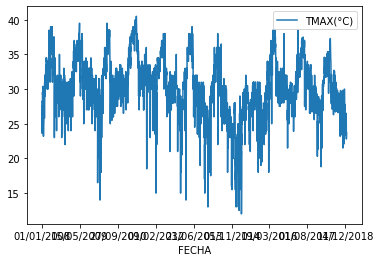

In [ ]:
#Grafica los datos
date_time = df.pop('FECHA')
plot_cols = ['TMAX(°C)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot()

# **Dividiendo training y testing**

In [ ]:
train = df['TMAX(°C)'][:len(df['TMAX(°C)'])-365]
test = df['TMAX(°C)'][len(df['TMAX(°C)'])-365:]

print(train)
print(test)

0       27.7
1       23.6
2       26.6
3       28.3
4       27.9
        ... 
3648    28.9
3649    27.8
3650    27.8
3651    27.7
3652    27.6
Name: TMAX(°C), Length: 3653, dtype: float64
3653    26.2
3654    27.5
3655    26.5
3656    27.4
3657    28.5
        ... 
4013    26.3
4014    24.1
4015    22.8
4016    23.6
4017    23.7
Name: TMAX(°C), Length: 365, dtype: float64


In [ ]:
time_valid = df['FECHA'][len(df['TMAX(°C)'])-365:]

# **Windowed dataset**

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
 series = tf.expand_dims(series, axis=-1)
 print(series)
 print(series.shape)
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size + 1))
 ds = ds.shuffle(shuffle_buffer)
 ds = ds.map(lambda w: (w[:-1], w[1:]))
 return ds.batch(batch_size).prefetch(1)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
shuffle_buffer_size = 1000
window_size = 64
batch_size = 365
train_set = windowed_dataset(train, window_size, batch_size, shuffle_buffer_size)
print(train.shape)

tf.Tensor(
[[27.7]
 [23.6]
 [26.6]
 ...
 [27.8]
 [27.7]
 [27.6]], shape=(3653, 1), dtype=float64)
(3653, 1)
(3653,)


In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv1D(filters=60, kernel_size=5,
 strides=1, padding="causal",
 activation="relu",
 input_shape=[None, 1]),
 tf.keras.layers.LSTM(60, return_sequences=True),
 tf.keras.layers.LSTM(60, return_sequences=True),
 tf.keras.layers.Dense(30, activation="relu"),
 tf.keras.layers.Dense(10, activation="relu"),
 tf.keras.layers.Dense(1),
 tf.keras.layers.Lambda(lambda x: x * 400)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

In [ ]:
optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
 optimizer=optimizer,
 metrics=["mae"])
history = model.fit(train_set,epochs=500)

Epoch 1/500
10/10 [==============================] - 4s 409ms/step - loss: 15.1932 - mae: 15.6848
Epoch 2/500
10/10 [==============================] - 4s 405ms/step - loss: 4.6271 - mae: 5.1044
Epoch 3/500
10/10 [==============================] - 4s 406ms/step - loss: 3.9868 - mae: 4.4638
Epoch 4/500
10/10 [==============================] - 4s 404ms/step - loss: 2.5656 - mae: 3.0280
Epoch 5/500
10/10 [==============================] - 4s 404ms/step - loss: 1.9695 - mae: 2.4216
Epoch 6/500
10/10 [==============================] - 4s 404ms/step - loss: 1.6461 - mae: 2.0884
Epoch 7/500
10/10 [==============================] - 4s 400ms/step - loss: 1.6856 - mae: 2.1317
Epoch 8/500
10/10 [==============================] - 4s 413ms/step - loss: 1.5305 - mae: 1.9698
Epoch 9/500
10/10 [==============================] - 4s 409ms/step - loss: 1.4051 - mae: 1.8386
Epoch 10/500
10/10 [==============================] - 4s 408ms/step - loss: 1.3490 - mae: 1.7791
Epoch 11/500
10/10 [=================

# **Historial de la perdida de error a lo largo del entrenamiento**

<Figure size 432x288 with 0 Axes>

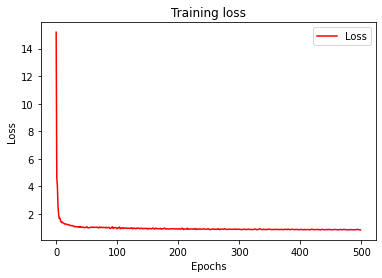

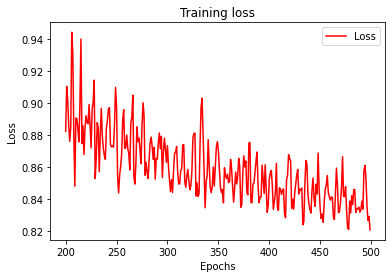

<Figure size 432x288 with 0 Axes>

In [ ]:
# — — — — — — — — — — — — — — — — — — — — — — — — — — — — — -
# Retrieve a list of list results on training and test data
# sets for each training epoch
# — — — — — — — — — — — — — — — — — — — — — — — — — — — — — -
loss=history.history["loss"]
epochs=range(len(loss)) # Get number of epochs
# — — — — — — — — — — — — — — — — — — — — — — — — 
# Plot training and validation loss per epoch
# — — — — — — — — — — — — — — — — — — — — — — — — 
plt.plot(epochs, loss, "r")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()
zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)
# — — — — — — — — — — — — — — — — — — — — — — — — 
# Plot training and validation loss per epoch
# — — — — — — — — — — — — — — — — — — — — — — — — 
plt.plot(zoomed_epochs, zoomed_loss, "r")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])
plt.figure()

In [ ]:
def model_forecast(model, series, window_size):
 ds = tf.data.Dataset.from_tensor_slices(series)
 ds = ds.window(window_size, shift=1, drop_remainder=True)
 ds = ds.flat_map(lambda w: w.batch(window_size))
 ds = ds.batch(32).prefetch(1)
 forecast = model.predict(ds)
 return forecast

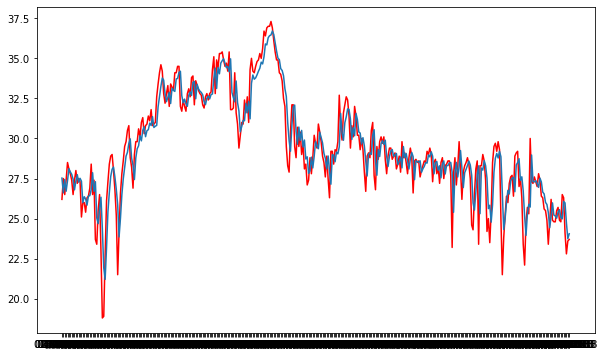

In [ ]:
rnn_forecast = model_forecast(model, df['TMAX(°C)'].to_numpy()[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[len(train) - window_size:-1, -1, 0]
plt.figure(figsize=(10, 6))
plt.plot(df.iloc[len(train):]['FECHA'], test, color='red')
plt.plot(df.iloc[len(train):]['FECHA'], rnn_forecast)
plt.show()

In [ ]:
# Guardar el Modelo
model.save(f'{root_path}/{FILES[0]}.h5')

# Recrea exactamente el mismo modelo solo desde el archivo
#new_model = keras.models.load_model(f'{root_path}/{FILE[0]}.h5')